In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [100]:
df = pd.read_csv(r'..\datasets\sam_df_clean_featured.csv')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83679 entries, 0 to 83678
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           83679 non-null  object 
 1   artists            83679 non-null  object 
 2   album_name         83679 non-null  object 
 3   track_name         83679 non-null  object 
 4   popularity         83679 non-null  int64  
 5   duration_ms        83679 non-null  int64  
 6   explicit           83679 non-null  bool   
 7   danceability       83679 non-null  float64
 8   energy             83679 non-null  float64
 9   key                83679 non-null  int64  
 10  loudness           83679 non-null  float64
 11  mode               83679 non-null  int64  
 12  speechiness        83679 non-null  float64
 13  acousticness       83679 non-null  float64
 14  instrumentalness   83679 non-null  float64
 15  liveness           83679 non-null  float64
 16  valence            836

In [102]:
df_numeric = df.select_dtypes(include="number")
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83679 entries, 0 to 83678
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         83679 non-null  int64  
 1   duration_ms        83679 non-null  int64  
 2   danceability       83679 non-null  float64
 3   energy             83679 non-null  float64
 4   key                83679 non-null  int64  
 5   loudness           83679 non-null  float64
 6   mode               83679 non-null  int64  
 7   speechiness        83679 non-null  float64
 8   acousticness       83679 non-null  float64
 9   instrumentalness   83679 non-null  float64
 10  liveness           83679 non-null  float64
 11  valence            83679 non-null  float64
 12  tempo              83679 non-null  float64
 13  time_signature     83679 non-null  int64  
 14  popularity_top_10  83679 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 9.6 MB


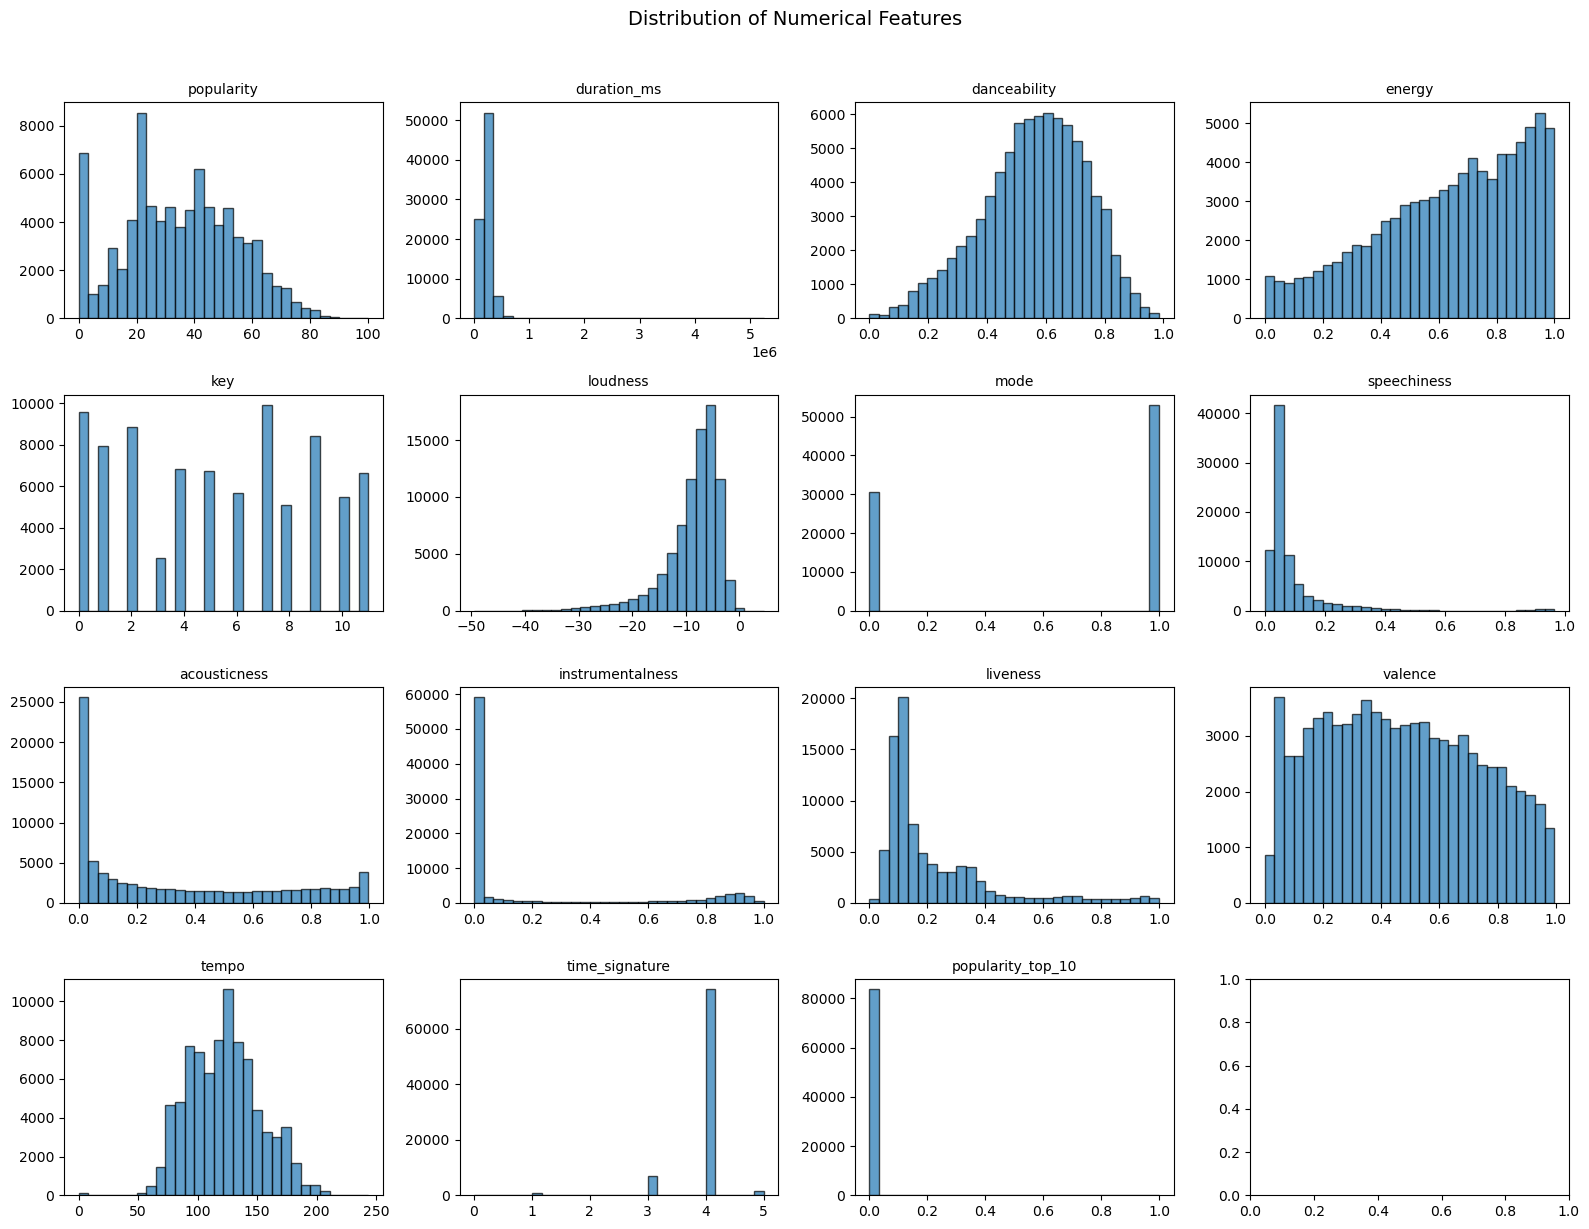

In [103]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(df_numeric.columns[:15]):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

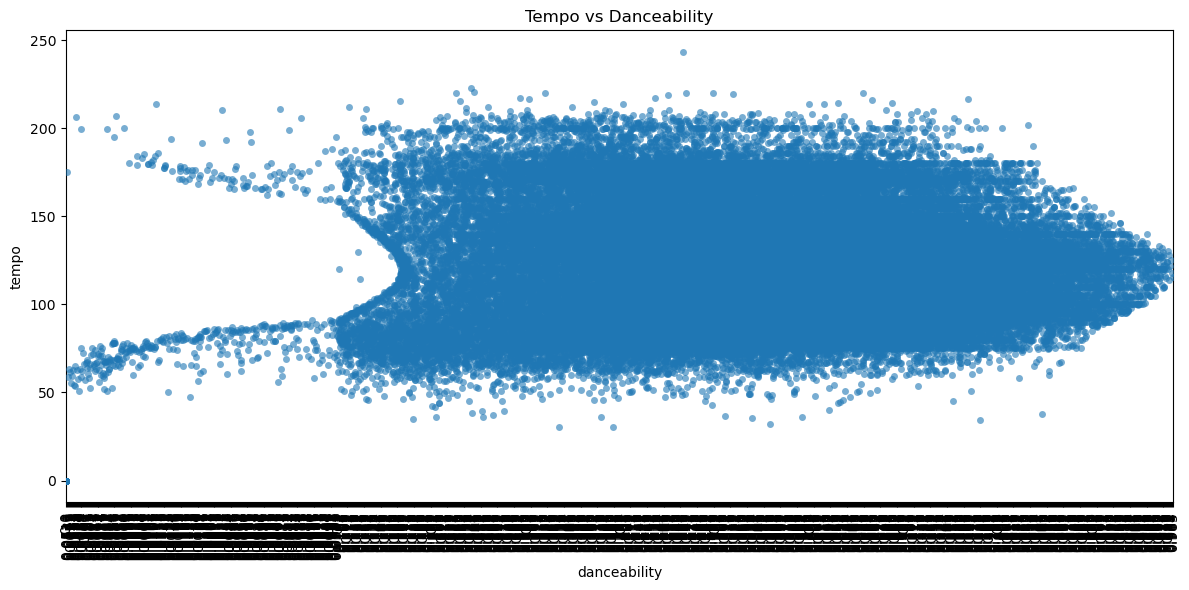

In [104]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='danceability', y='tempo', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Tempo vs Danceability')
plt.tight_layout()
plt.show()

In [105]:
corr_matrix = df_numeric.corr().round(2)

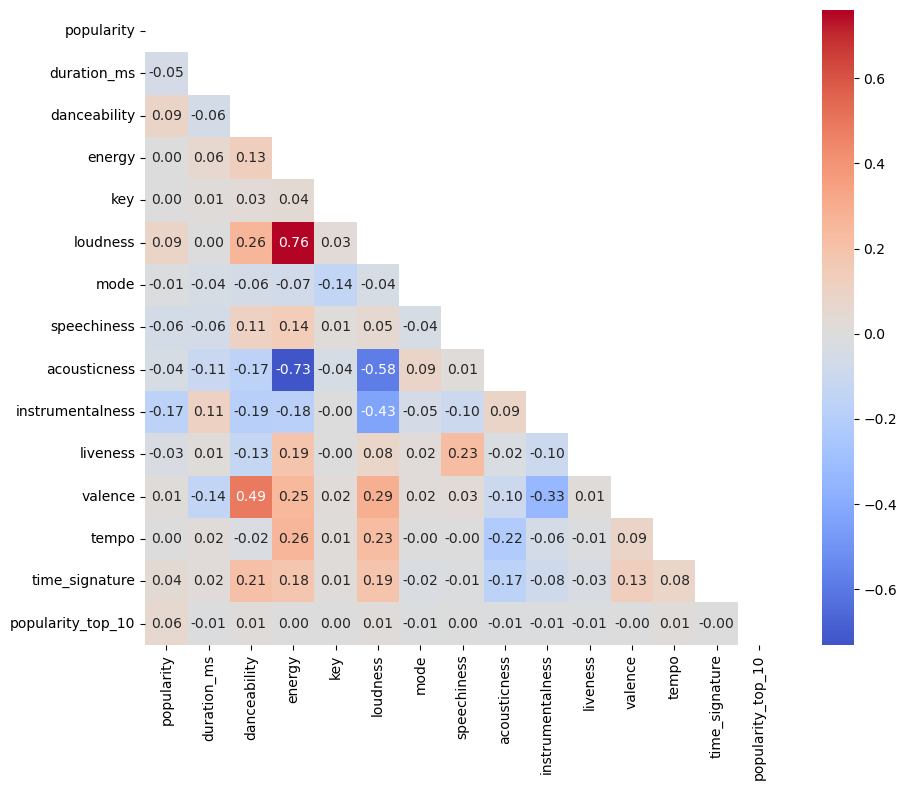

In [106]:
# Assuming corr_matrix from before
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,                          # Hides upper triangle
    cmap="coolwarm",                    # Red-blue diverging colormap
    center=0,                           # Centers white at 0 correlation
    square=True,                        # Square cells
    annot=True,                         # Show values
    fmt=".2f"                           # 2 decimal places
)
plt.tight_layout()
plt.show()

In [107]:
ordinal_mappings = {
    'popularity_bin': {'Niche Tracks': 1, 
                             'Club Filler': 2, 
                             'Radio Hits': 3, 
                             'Chart Climbers': 4, 
                             'Bangers': 5},
    'energy_code': {'Chill': 1, 
                        'Mellow': 2, 
                        'Upbeat': 3, 
                        'High-Energy': 4},
    'loudness_code': {'Very Quiet': 1,
                                   'Quiet': 2, 
                                   'Low': 3, 
                                   'Medium': 4, 
                                   'Loud': 5, 
                                   'Very Loud': 6,
                                   'Mega Loud': 7},
    'dance_level': {'Still': 1, 
                        'Sway': 2, 
                        'Groove': 3, 
                        'Bump': 4, 
                        'Rave': 5},
    'music_valence': {'sad/angry': 1, 
              'neutral/melancholy': 2, 
              'happy/content': 3, 
              'cheerful/upbeat': 4},
    'tempo_bin': {'slow': 1,
               'mid': 2, 
               'fast': 3, 
               'very_fast': 4}
}

In [108]:
df1 = df.copy()

In [109]:
for col, mapping in ordinal_mappings.items():
    df1[col] = df1[col].map(mapping)

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83679 entries, 0 to 83678
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           83679 non-null  object 
 1   artists            83679 non-null  object 
 2   album_name         83679 non-null  object 
 3   track_name         83679 non-null  object 
 4   popularity         83679 non-null  int64  
 5   duration_ms        83679 non-null  int64  
 6   explicit           83679 non-null  bool   
 7   danceability       83679 non-null  float64
 8   energy             83679 non-null  float64
 9   key                83679 non-null  int64  
 10  loudness           83679 non-null  float64
 11  mode               83679 non-null  int64  
 12  speechiness        83679 non-null  float64
 13  acousticness       83679 non-null  float64
 14  instrumentalness   83679 non-null  float64
 15  liveness           83679 non-null  float64
 16  valence            836

In [111]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns

for col in cat_cols:
    df1[col] = pd.factorize(df1[col])[0]
    df1.rename(columns={col: f"{col}_code"}, inplace=True)

In [112]:
df1['explicit'] = pd.to_numeric(df1['explicit'], errors='coerce').fillna(0).astype(int)

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83679 entries, 0 to 83678
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id_code           83679 non-null  int64  
 1   artists_code            83679 non-null  int64  
 2   album_name_code         83679 non-null  int64  
 3   track_name_code         83679 non-null  int64  
 4   popularity              83679 non-null  int64  
 5   duration_ms             83679 non-null  int64  
 6   explicit                83679 non-null  int64  
 7   danceability            83679 non-null  float64
 8   energy                  83679 non-null  float64
 9   key                     83679 non-null  int64  
 10  loudness                83679 non-null  float64
 11  mode                    83679 non-null  int64  
 12  speechiness             83679 non-null  float64
 13  acousticness            83679 non-null  float64
 14  instrumentalness        83679 non-null

In [114]:
corr_matrix2 = df1.corr().round(2)

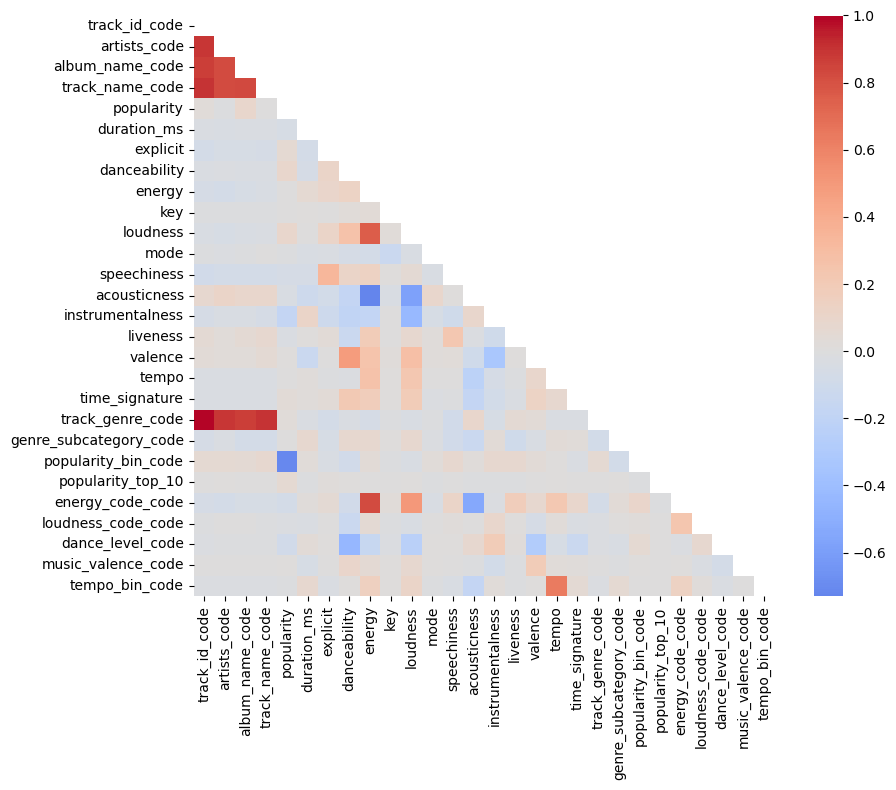

In [115]:
# Assuming corr_matrix from before
mask = np.triu(np.ones_like(corr_matrix2, dtype=bool))  # Upper triangle mask

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix2,
    mask=mask,                          # Hides upper triangle
    cmap="coolwarm",                    # Red-blue diverging colormap
    center=0,                           # Centers white at 0 correlation
    square=True,                        # Square cells
    annot=False,                         # Show values
    fmt=".2f"                           # 2 decimal places
)
plt.tight_layout()
plt.show()

In [116]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [117]:
ml_df = df1.copy()

In [118]:
X = ml_df.drop(['popularity','popularity_bin_code'], axis=1) 
y = ml_df['popularity_bin_code']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

c:\Users\tishs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=42)

In [121]:
preds = model.predict(X_test_scaled)
probs = model.predict_proba(X_test_scaled)
print(classification_report(y_test, preds, target_names=['Niche Tracks', 
                             'Club Filler', 
                             'Radio Hits', 
                             'Chart Climbers', 
                             'Bangers']))

                precision    recall  f1-score   support

  Niche Tracks       0.31      0.02      0.03      1594
   Club Filler       0.41      0.42      0.41      4974
    Radio Hits       1.00      0.09      0.16        91
Chart Climbers       0.49      0.44      0.46      4079
       Bangers       0.46      0.61      0.53      5998

      accuracy                           0.45     16736
     macro avg       0.53      0.31      0.32     16736
  weighted avg       0.44      0.45      0.43     16736



In [122]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
y_pred = rf_baseline.predict(X_test)

In [124]:
accuracy = accuracy_score(y_test, y_pred)

In [125]:
accuracy * 100

79.06907265774379

In [126]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['Niche Tracks', 
                             'Club Filler', 
                             'Radio Hits', 
                             'Chart Climbers', 
                             'Bangers']))

                precision    recall  f1-score   support

  Niche Tracks       0.69      0.55      0.61      1594
   Club Filler       0.75      0.76      0.76      4974
    Radio Hits       0.65      0.14      0.23        91
Chart Climbers       0.84      0.87      0.86      4079
       Bangers       0.81      0.83      0.82      5998

      accuracy                           0.79     16736
     macro avg       0.75      0.63      0.66     16736
  weighted avg       0.79      0.79      0.79     16736



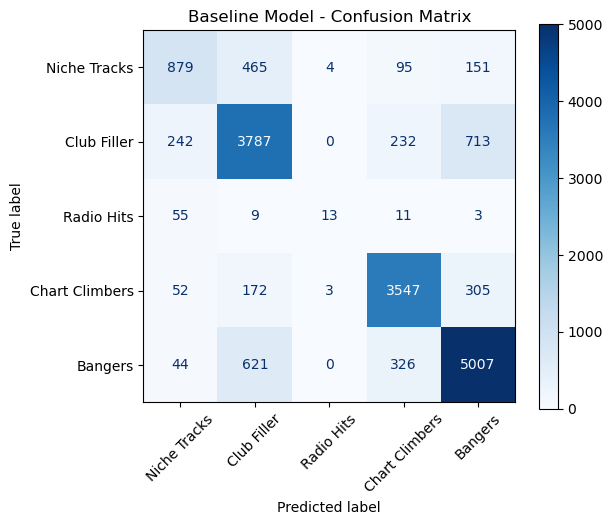

In [128]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Niche Tracks', 
                             'Club Filler', 
                             'Radio Hits', 
                             'Chart Climbers', 
                             'Bangers'])
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Baseline Model - Confusion Matrix')
plt.show()

In [129]:
rf_baseline.feature_importances_

array([0.14102901, 0.09980168, 0.11872729, 0.10776851, 0.04046596,
       0.00380844, 0.03555354, 0.03622122, 0.0184927 , 0.03716888,
       0.00522865, 0.03502133, 0.041797  , 0.03923344, 0.03068635,
       0.03610645, 0.03127904, 0.00343474, 0.05836876, 0.03898964,
       0.00023937, 0.00781589, 0.00907894, 0.00863419, 0.00780778,
       0.00724121])

In [130]:
X_encoded = X.copy()
X_encoded.columns

Index(['track_id_code', 'artists_code', 'album_name_code', 'track_name_code',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre_code',
       'genre_subcategory_code', 'popularity_top_10', 'energy_code_code',
       'loudness_code_code', 'dance_level_code', 'music_valence_code',
       'tempo_bin_code'],
      dtype='object')

In [131]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_baseline.feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

In [132]:
feature_importance

,feature,importance
0,track_id_code,0.141029
2,album_name_code,0.118727
3,track_name_code,0.107769
1,artists_code,0.099802
18,track_genre_code,0.058369
12,acousticness,0.041797
4,duration_ms,0.040466
13,instrumentalness,0.039233
19,genre_subcategory_code,0.038990
9,loudness,0.037169


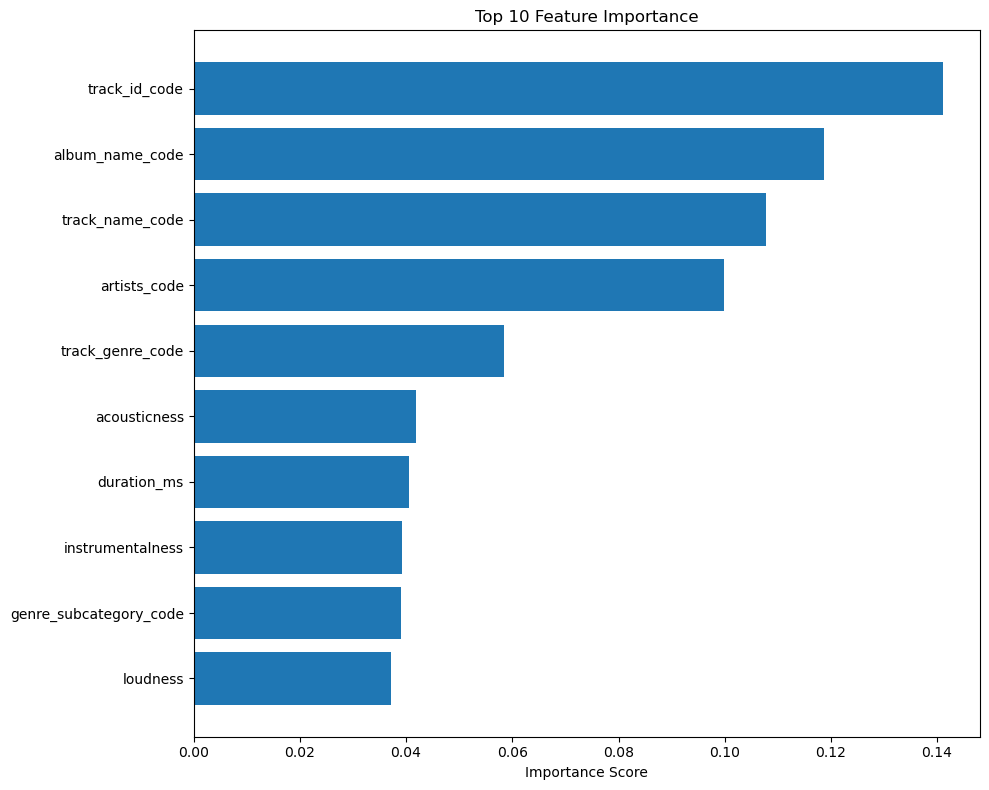

In [133]:
# Visualise feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [135]:
# Select top features
top_n = 3
selected_features = feature_importance.head(top_n)['feature'].tolist()

selected_features

['track_id_code', 'album_name_code', 'track_name_code']

In [136]:
# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [137]:
accuracy_selected * 100

76.54158699808795

In [138]:
(accuracy_selected - accuracy) * 100

-2.527485659655837

In [139]:
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV

# Define parameter grid (simple)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [140]:
# Grid search with cross-validation
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid, param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [141]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

In [142]:
grid_search.best_score_

np.float64(0.7733893356307033)

In [144]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [145]:
accuracy

0.7906907265774379

In [146]:
accuracy_selected

0.7654158699808795

In [147]:
accuracy_best

0.7829827915869981

In [148]:
(accuracy_best - accuracy)*100

-0.7707934990439758

In [149]:
print(classification_report(y_test, y_pred_best, target_names= ['Niche Tracks', 
                             'Club Filler', 
                             'Radio Hits', 
                             'Chart Climbers', 
                             'Bangers'
                             ]))

                precision    recall  f1-score   support

  Niche Tracks       0.64      0.55      0.59      1594
   Club Filler       0.73      0.75      0.74      4974
    Radio Hits       0.53      0.27      0.36        91
Chart Climbers       0.86      0.88      0.87      4079
       Bangers       0.81      0.82      0.81      5998

      accuracy                           0.78     16736
     macro avg       0.71      0.65      0.68     16736
  weighted avg       0.78      0.78      0.78     16736



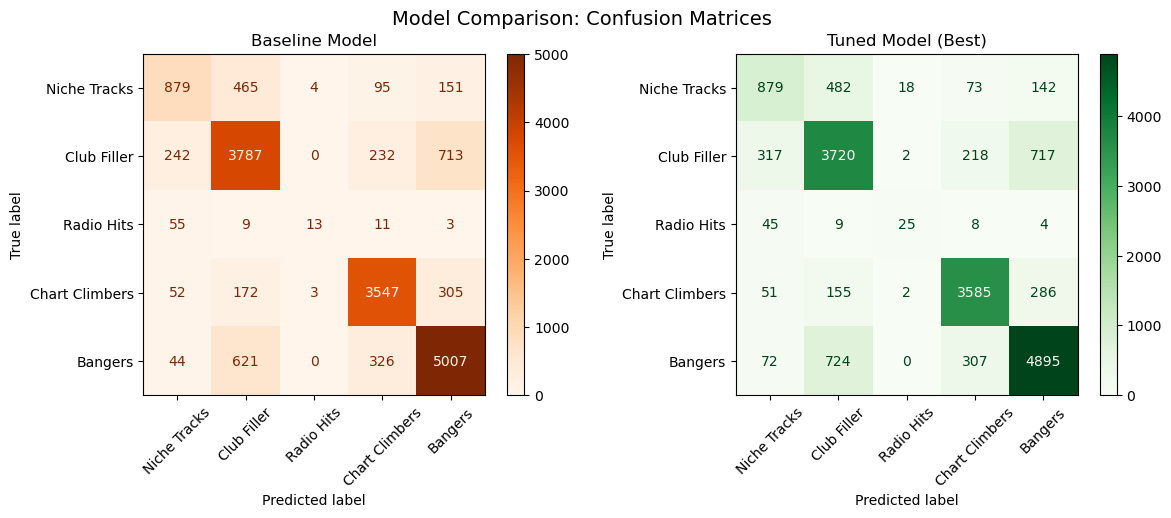

In [151]:
# Final confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
cm_baseline = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, 
                                display_labels=['Niche Tracks', 
                             'Club Filler', 
                             'Radio Hits', 
                             'Chart Climbers', 
                             'Bangers'])
disp1.plot(ax=axes[0], cmap='Oranges', xticks_rotation=45)
axes[0].set_title('Baseline Model')

# Best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_best, 
                                display_labels=['Niche Tracks', 
                             'Club Filler', 
                             'Radio Hits', 
                             'Chart Climbers', 
                             'Bangers'])
disp2.plot(ax=axes[1], cmap='Greens', xticks_rotation=45)
axes[1].set_title('Tuned Model (Best)')

plt.suptitle('Model Comparison: Confusion Matrices', fontsize=14)
plt.tight_layout()
plt.show()